In [ ]:
import numpy as np
import tensorflow as tf

In [ ]:
x=[]
y=[]

for i in range(10):
  lst = list(range(i, i+4))
  x.append(list(map(lambda c: [c/10], lst)))
  y.append((i+4)/10)

X = np.array(x)
Y = np.array(y)

for i in range(len(x)):
  print(x[i], y[i])

[[0.0], [0.1], [0.2], [0.3]] 0.4
[[0.1], [0.2], [0.3], [0.4]] 0.5
[[0.2], [0.3], [0.4], [0.5]] 0.6
[[0.3], [0.4], [0.5], [0.6]] 0.7
[[0.4], [0.5], [0.6], [0.7]] 0.8
[[0.5], [0.6], [0.7], [0.8]] 0.9
[[0.6], [0.7], [0.8], [0.9]] 1.0
[[0.7], [0.8], [0.9], [1.0]] 1.1
[[0.8], [0.9], [1.0], [1.1]] 1.2
[[0.9], [1.0], [1.1], [1.2]] 1.3


In [ ]:
rnn = tf.keras.Sequential([
                           tf.keras.layers.SimpleRNN(units=10, return_sequences=False, input_shape=[4,1]),
                           tf.keras.layers.Dense(1)
])

rnn.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_6 (SimpleRNN)    (None, 10)                120       
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


In [ ]:
rnn.compile(optimizer='SGD', loss='mse')

rnn.fit(X, Y, epochs=10)
pred = rnn.predict(X)

Epoch 1/10
1/1 [==============================] - 1s 611ms/step - loss: 0.0725
Epoch 2/10
1/1 [==============================] - 0s 13ms/step - loss: 0.0400
Epoch 3/10
1/1 [==============================] - 0s 11ms/step - loss: 0.0232
Epoch 4/10
1/1 [==============================] - 0s 14ms/step - loss: 0.0143
Epoch 5/10
1/1 [==============================] - 0s 17ms/step - loss: 0.0094
Epoch 6/10
1/1 [==============================] - 0s 12ms/step - loss: 0.0068
Epoch 7/10
1/1 [==============================] - 0s 11ms/step - loss: 0.0053
Epoch 8/10
1/1 [==============================] - 0s 10ms/step - loss: 0.0044
Epoch 9/10
1/1 [==============================] - 0s 10ms/step - loss: 0.0039
Epoch 10/10
1/1 [==============================] - 0s 11ms/step - loss: 0.0036


In [ ]:
print(rnn.predict(np.array([[[1.5],[1.6],[1.7],[1.8]]]))) #1.9
print(rnn.predict(np.array([[[-0.1],[0.0],[0.1],[0.2]]]))) #0.3

[[1.4443376]]
[[0.34286574]]


# 감성 리뷰 분석

In [ ]:
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras.layers import Dense

In [ ]:
max_vocab = 10000
maxlen = 500
batch_size = 128

In [ ]:
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_vocab)
print(len(input_train), len(input_test))

25000 25000


In [ ]:
print(input_train[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [ ]:
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)

print(input_train.shape, input_test.shape)

(25000, 500) (25000, 500)


In [ ]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Embedding(max_vocab, 100))
model.add(tf.keras.layers.LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, None, 100)         1000000   
                                                                 
 lstm_2 (LSTM)               (None, 32)                17024     
                                                                 
 dense_8 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1,017,057
Trainable params: 1,017,057
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 6s 28ms/step - loss: 0.4856 - acc: 0.7754 - val_loss: 0.4026 - val_acc: 0.8226
Epoch 2/10
157/157 [==============================] - 4s 24ms/step - loss: 0.2883 - acc: 0.8870 - val_loss: 0.3506 - val_acc: 0.8476
Epoch 3/10
157/157 [==============================] - 4s 24ms/step - loss: 0.2289 - acc: 0.9147 - val_loss: 0.3017 - val_acc: 0.8764
Epoch 4/10
157/157 [==============================] - 4s 24ms/step - loss: 0.1887 - acc: 0.9313 - val_loss: 0.3234 - val_acc: 0.8578
Epoch 5/10
157/157 [==============================] - 4s 26ms/step - loss: 0.1710 - acc: 0.9382 - val_loss: 0.3566 - val_acc: 0.8802
Epoch 6/10
157/157 [==============================] - 4s 24ms/step - loss: 0.1452 - acc: 0.9487 - val_loss: 0.3197 - val_acc: 0.8784
Epoch 7/10
157/157 [==============================] - 4s 24ms/step - loss: 0.1249 - acc: 0.9538 - val_loss: 0.4124 - val_acc: 0.8808
Epoch 8/10
157/157 [==============================] - 4s 24ms/step - 

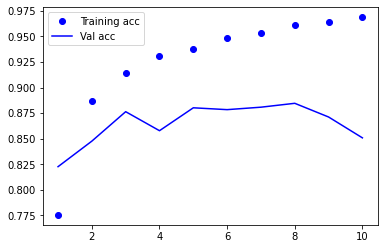

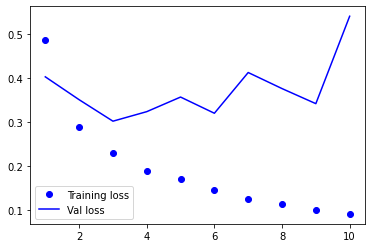

In [ ]:
import matplotlib.pyplot as plt

acc=history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Val acc')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Val loss')
plt.legend()

plt.show()

In [ ]:
import re
def sentiment_predict(new_sentence):
  # 알파벳과 숫자를 제외하고 모두 제거 및 알파벳 소문자화
  new_sentence = re.sub('[^0-9a-zA-Z ]', '', new_sentence).lower()
  encoded = []
  word_to_index = imdb.get_word_index()

  # 띄어쓰기 단위 토큰화 후 정수 인코딩
  for word in new_sentence.split():
    try :
      # 단어 집합의 크기를 10,000으로 제한.
      if word_to_index[word] <= 10000:
        encoded.append(word_to_index[word]+3)
      else:
      # 10,000 이상의 숫자는 <unk> 토큰으로 변환.
        encoded.append(2)
    # 단어 집합에 없는 단어는 <unk> 토큰으로 변환.
    except KeyError:
      encoded.append(2)

  pad_sequence = sequence.pad_sequences([encoded], maxlen=maxlen)
  score = float(model.predict(pad_sequence)) # 예측

  if(score > 0.5):
    print("{:.2f}% 확률로 긍정 리뷰입니다.".format(score * 100))
  else:
    print("{:.2f}% 확률로 부정 리뷰입니다.".format((1 - score) * 100))
   
    ### https://www.imdb.com/title/tt10648342/reviews?sort=userRating&dir=desc&ratingFilter=0
### 토르

text='''I walked out of the theater stunned. My mind trying so hard to process what I just watched. Everyone else coming out of the theater was also speechless. I wish this movie was 5 hours long because I never wanted it to end! Comedy, action, visually stunning, sensory overload in the best way. I will rewatch this movie 5 more times just so I can try to grasp this incredible plot and put the pieces together of what I just witnessed. Love love love it, another big win in the books for Taika Waititi.'''
sentiment_predict(text)

text2='''Christian Bale is great, Russell Crowe has a good moment, Hemsworth is good but this movie cannot be saved from a terrible script, bad direction and stupid humour that overstays its welcome.'''
sentiment_predict(text2)


88.41% 확률로 긍정 리뷰입니다.
99.76% 확률로 부정 리뷰입니다.
